In [1]:
#ΟΝΟΜΑ : Χρήστος Τριανταφύλλου Αρχολέκας
#AM : 1115201700166

#ΟΝΟΜΑ : Ιωάννης Τζιεράκης
#ΑΜ : 1115201700163

#CREATE TRAIN.CSV,TEST.CSV AND DATAFRAME

import pandas as pd
import numpy as np
from tqdm import tqdm
import nltk 
from nltk.collocations import *
from nltk.metrics import (
    ContingencyMeasures,
    BigramAssocMeasures
)
from nltk.util import ngrams
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, roc_auc_score


import re 
import os
import sys
import errno
import glob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

path1 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\business\*txt'
path2 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\entertainment\*txt' 
path3 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\politics\*txt'
path4 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\sport\*txt'
path5 = r'C:\Users\pltzi\Desktop\data mining\PRJ2\fulltext\fulltext\data\tech\*txt'

# path1 = r'D:\DIT\Python Programs\DataMining\Prj2\data\business\*txt'
# path2 = r'D:\DIT\Python Programs\DataMining\Prj2\data\entertainment\*txt' 
# path3 = r'D:\DIT\Python Programs\DataMining\Prj2\data\politics\*txt'
# path4 = r'D:\DIT\Python Programs\DataMining\Prj2\data\sport\*txt'
# path5 = r'D:\DIT\Python Programs\DataMining\Prj2\data\tech\*txt'

column_names = ["id", "title", "content","category"]
train_df = pd.DataFrame(columns = column_names)
test_df = pd.DataFrame(columns = column_names)
id_sum = 0

#creating train and test files seperately
for i in range(5):
    titles = []
    contents = []
    if i == 0: 
        files1 = glob.glob(path1)
    elif i == 1 :
        files1 = glob.glob(path2)
    elif i == 2 :
        files1 = glob.glob(path3)
    elif i == 3 :
        files1 = glob.glob(path4)    
    elif i == 4 :
        files1 = glob.glob(path5)
    
    prc = 0
    for name in files1:
        x = -1
        prc += 1
        try:
            with open(name) as f:
                lines = []
                for line in f:
                    x += 1
                    if x!=0:
                        lines.append(line)
                    else:
                        titles.append(line)
                
                striga = str(lines)
                contents.append(striga)
            
            
                    
                 
               
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise
    
    # column_names = ["id", "title", "content","category"]
    df = pd.DataFrame(columns = column_names)
    for p in range(len(files1)):
        df['id'] = np.arange(len(files1)) + id_sum
        
    id_sum += prc        
        
    k = 0    
    for j in titles:
        df['title'][k] = j
        k += 1   


    k = 0    
    for m in contents:
        df['content'][k] = m
        k += 1

    if i == 0: 
        df['category'] = 'business'
        df['category'].fillna('business', inplace = True)
    elif i == 1 :
        df['category'] = 'entertainment'
        df['category'].fillna('entertainment', inplace = True)
    elif i == 2 :
        df['category'] = 'politics'
        df['category'].fillna('politics', inplace = True)
    elif i == 3 :
        df['category'] = 'sport'
        df['category'].fillna('sport', inplace = True)    
    elif i == 4 :
        df['category'] = 'tech'
        df['category'].fillna('tech', inplace = True)   
    
    #spliting train and test 80 to 20
    train_prc = prc*80/100
    train_df = train_df.append(df.head(int(train_prc)))
    test_prc = prc*20/100
    test_df = test_df.append(df.tail(int(test_prc)))
    
# train_df['content']=train_df['content'].str.replace('n','')    
# test_df['content']=test_df['content'].str.replace('n','')


#create csv files
train_df.to_csv("train_set.csv",index = False, header = True)
test_df.to_csv("test_set.csv",index = False, header = True)

C:\Users\pltzi\anaconda3\lib\site-packages\ipykernel_launcher.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pltzi\anaconda3\lib\site-packages\ipykernel_launcher.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [2]:
#QUESTION 1

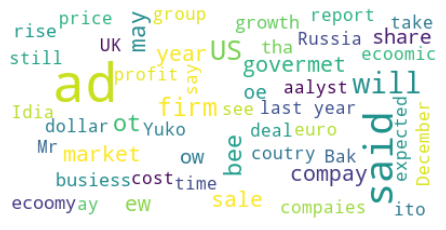

In [3]:
text = train_df['content'].loc[train_df['category'] == 'business'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

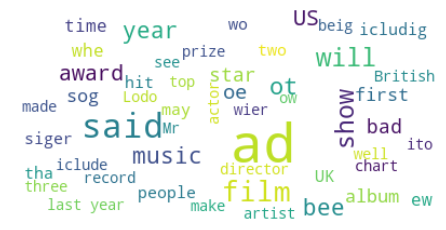

In [4]:
text = train_df['content'].loc[train_df['category'] == 'entertainment'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

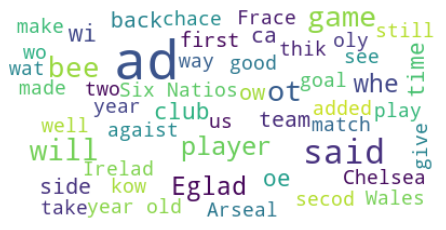

In [5]:
text = train_df['content'].loc[train_df['category'] == 'sport'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

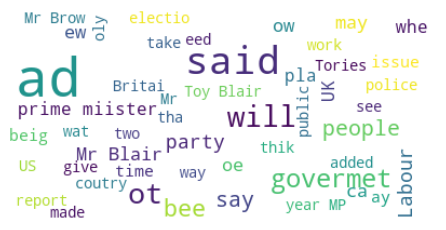

In [6]:
text = train_df['content'].loc[train_df['category'] == 'politics'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

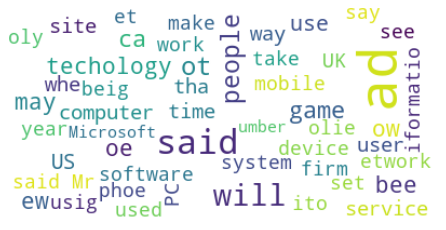

In [7]:
text = train_df['content'].loc[train_df['category'] == 'tech'].values
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS ,max_font_size=50, max_words=50, background_color="white").generate(str(text))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
#Question 2

In [9]:
txt1 = train_df['content']
txt2 = test_df['content']

#create train and test y's
Train_Y = train_df['category']
Test_Y = test_df['category']

In [10]:
#Support Vector Machines (SVM)

In [11]:
#BOW

In [12]:
#creating BOW vectorizer and bow train and test x's
BOW_vectorizer = CountVectorizer()
BOW_Train_X = BOW_vectorizer.fit_transform(txt1).toarray()
BOW_Test_X = BOW_vectorizer.transform(txt2).toarray()


In [13]:
from sklearn import metrics
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 3]}
# svc = svm.SVC(probability=True)
# svclassifier = GridSearchCV(svc, parameters)

#Accuracy score
svclassifier = svm.SVC(probability = True)
clf=svclassifier.fit(BOW_Train_X,Train_Y)
scores = cross_validate(clf, BOW_Test_X, Test_Y, scoring="accuracy")

print(scores)

{'fit_time': array([4.98837304, 5.07103658, 5.24967432, 4.93467927, 5.04850173]), 'score_time': array([0.93106079, 1.07217574, 0.89924836, 0.92189765, 0.91257286]), 'test_score': array([0.80898876, 0.8988764 , 0.82022472, 0.83146067, 0.875     ])}


In [14]:
#Precision / Recall / F-Measure score

scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring=scoring)
print(scores)

{'fit_time': array([4.88902974, 5.08198786, 5.43846822, 5.26197028, 4.87402225]), 'score_time': array([0.89611268, 0.99784398, 1.09033895, 0.91416335, 0.91803598]), 'test_precision_macro': array([0.87393939, 0.93530378, 0.86149425, 0.83778966, 0.90800866]), 'test_recall_macro': array([0.78073529, 0.88730392, 0.8       , 0.82297619, 0.86441176]), 'test_f1_macro': array([0.78406038, 0.8992992 , 0.8039959 , 0.82414002, 0.87331144])}


In [15]:
#Roc auc score

scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

In [16]:
#TF_IDF

In [17]:
#creating TF-IDF vectorizer and tf-idf train and test x's 
TF_IDF_vectorizer = TfidfVectorizer(ngram_range = (1, 2),stop_words=STOPWORDS) 
TF_IDF_Train_X = TF_IDF_vectorizer.fit_transform(txt1)
TF_IDF_Test_X = TF_IDF_vectorizer.transform(txt2)

C:\Users\pltzi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [18]:
# Accuracy score
clf=svclassifier.fit(TF_IDF_Train_X,Train_Y)
scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring="accuracy")
print(scores)

{'fit_time': array([0.33154321, 0.33699107, 0.33410597, 0.34903479, 0.34213305]), 'score_time': array([0.05182552, 0.051862  , 0.05466676, 0.05687642, 0.05182791]), 'test_score': array([0.68539326, 0.94382022, 0.83146067, 0.88764045, 0.94318182])}


In [19]:
#Precision / Recall / F-Measure score

scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring=scoring)
print(scores)

{'fit_time': array([0.33614254, 0.34403872, 0.33917117, 0.33380055, 0.33513498]), 'score_time': array([0.05384493, 0.05684781, 0.05481648, 0.05484915, 0.05385184]), 'test_precision_macro': array([0.88571429, 0.96153846, 0.91428571, 0.93333333, 0.96      ]), 'test_recall_macro': array([0.67073529, 0.93730392, 0.8125    , 0.87797619, 0.935     ]), 'test_f1_macro': array([0.69636304, 0.94548608, 0.82618242, 0.89305299, 0.94222222])}


In [20]:
#Roc auc score

scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

In [21]:
#Random Forests

In [22]:
#BOW

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing

RFclassifier=RandomForestClassifier(n_estimators=100)

clf = RFclassifier.fit(BOW_Train_X,Train_Y)
scores = cross_validate(clf, BOW_Test_X, Test_Y, scoring="accuracy")
print(scores)

### A failed attempt to create roc plot in comments ###

# r_probs=[0 for _ in range(len(Test_Y))]
# rf_probs=RFclassifier.predict_proba(BOW_Test_X)

# rf_probs = rf_probs[:,1]

# r_auc = roc_auc_score(Test_Y, r_probs,multi_class='ovr')
# rf_auc = roc_auc_score(Test_Y, rf_probs,multi_class='ovr')

# rf_fpr, rf_tpr, _ = roc_curve(Test_Y, rf_probs)

# print(rf_auc)



# # plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
# plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
# # plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# # Title
# plt.title('ROC Plot')
# # Axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # Show legend
# plt.legend() # 
# # Show plot
# plt.show()

{'fit_time': array([0.877563  , 0.8782177 , 0.87916732, 0.87501025, 0.89173913]), 'score_time': array([0.01963902, 0.01695466, 0.01898599, 0.01894951, 0.0179522 ]), 'test_score': array([0.88764045, 0.94382022, 0.88764045, 0.92134831, 0.97727273])}


In [24]:
#Precision / Recall / F-Measure score

scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring=scoring)
print(scores)

{'fit_time': array([0.88772726, 0.87118578, 0.88352084, 0.93840694, 0.88419962]), 'score_time': array([0.02097487, 0.01997852, 0.02045369, 0.01895094, 0.02296519]), 'test_precision_macro': array([0.91874063, 0.96166667, 0.93109244, 0.92328205, 0.96666667]), 'test_recall_macro': array([0.85823529, 0.94990196, 0.8875    , 0.9025    , 0.95073529]), 'test_f1_macro': array([0.86941448, 0.95393939, 0.89499759, 0.90859968, 0.95506792])}


In [25]:
#Roc auc score

scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

{'fit_time': array([0.89012814, 0.88835239, 0.88746452, 0.87024355, 0.87423086]), 'score_time': array([0.02293921, 0.02094436, 0.01997328, 0.01994705, 0.01997685]), 'test_score': array([0.9946521 , 0.99768836, 0.99397384, 0.99479626, 0.99730086])}


In [26]:
#TF_IDF Random Forest

In [27]:
#Accuracy score

clf = RFclassifier.fit(TF_IDF_Train_X,Train_Y)
scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring="accuracy")
print(scores)

{'fit_time': array([1.55526328, 1.68755293, 1.8742528 , 1.64246297, 1.56867528]), 'score_time': array([0.13128209, 0.16507149, 0.18350768, 0.12768888, 0.12917686]), 'test_score': array([0.91011236, 0.92134831, 0.87640449, 0.93258427, 0.96590909])}


In [28]:
#Precision / Recall / F-Measure score

scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf, TF_IDF_Test_X, Test_Y, scoring=scoring)
print(scores)

{'fit_time': array([1.60689068, 1.55171514, 1.59063387, 1.56378198, 1.55639553]), 'score_time': array([0.12968564, 0.1286571 , 0.1256659 , 0.13264561, 0.12965345]), 'test_precision_macro': array([0.93181818, 0.95      , 0.93793103, 0.93855072, 0.97391304]), 'test_recall_macro': array([0.88333333, 0.91387255, 0.8875    , 0.9275    , 0.96166667]), 'test_f1_macro': array([0.89333333, 0.92448753, 0.89765684, 0.9315829 , 0.96581663])}


In [29]:
#Roc auc score

scores = cross_validate(clf,TF_IDF_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

{'fit_time': array([1.59754658, 1.55393052, 1.6243391 , 1.58946681, 1.56318521]), 'score_time': array([0.13075376, 0.13065243, 0.13065195, 0.12862492, 0.12669659]), 'test_score': array([0.9950388 , 0.99964859, 0.98934361, 0.99735855, 1.        ])}


In [30]:
#Naive Bayes

In [31]:
#BoW

In [32]:
#Accuracy score

gnb = GaussianNB()
clf = gnb.fit(BOW_Train_X,Train_Y)
scores = cross_validate(clf, BOW_Test_X, Test_Y, scoring="accuracy")
print(scores)

{'fit_time': array([0.19944215, 0.20348907, 0.20353889, 0.20046282, 0.20242691]), 'score_time': array([0.13866258, 0.14362097, 0.1376276 , 0.1376338 , 0.13663292]), 'test_score': array([0.83146067, 0.92134831, 0.87640449, 0.91011236, 0.93181818])}


In [33]:
#Precision / Recall / F-Measure score

scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring=scoring)
print(scores)

{'fit_time': array([0.20505786, 0.20050287, 0.20199728, 0.20345402, 0.20244575]), 'score_time': array([0.14274335, 0.14163136, 0.14062929, 0.1397047 , 0.13811827]), 'test_precision_macro': array([0.85008772, 0.93132832, 0.87713033, 0.90841503, 0.93063725]), 'test_recall_macro': array([0.84095238, 0.92504202, 0.8675    , 0.91297619, 0.93063725]), 'test_f1_macro': array([0.8222487 , 0.92357642, 0.86775261, 0.90933177, 0.93063725])}


In [34]:
#Roc auc score

scores = cross_validate(clf,BOW_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

{'fit_time': array([0.20657754, 0.20252943, 0.20249009, 0.20246458, 0.20195675]), 'score_time': array([0.1411016 , 0.14062881, 0.13959551, 0.13961935, 0.13805032]), 'test_score': array([0.89976839, 0.95273052, 0.91844327, 0.94537037, 0.9568018 ])}


In [35]:
#TF_IDF

In [36]:
#Accuracy

clf = gnb.fit(TF_IDF_Train_X.toarray(),Train_Y)
scores = cross_validate(clf, TF_IDF_Test_X.toarray(), Test_Y, scoring="accuracy")
print(scores)

{'fit_time': array([2.72233391, 2.56156921, 2.52431798, 2.42613578, 2.75530553]), 'score_time': array([1.90641069, 1.71879411, 1.67439389, 1.67592764, 1.70551705]), 'test_score': array([0.82022472, 0.93258427, 0.88764045, 0.91011236, 0.96590909])}


In [37]:
#Precision / Recall / F-Measure score

scoring=['precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf,TF_IDF_Test_X, Test_Y, scoring=scoring)
print(scores)

{'fit_time': array([0.01224566, 0.00398946, 0.00099683, 0.00099802, 0.0019958 ]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_precision_macro': array([nan, nan, nan, nan, nan]), 'test_recall_macro': array([nan, nan, nan, nan, nan]), 'test_f1_macro': array([nan, nan, nan, nan, nan])}


C:\Users\pltzi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

  FitFailedWarning)


In [38]:
#Roc auc score

scores = cross_validate(clf,TF_IDF_Test_X, Test_Y, scoring="roc_auc_ovr")
print(scores)

{'fit_time': array([0.00199842, 0.00099635, 0.00099754, 0.00102806, 0.00099778]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([nan, nan, nan, nan, nan])}


C:\Users\pltzi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

  FitFailedWarning)


In [131]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn import metrics

class KNearestNeighbors(BaseEstimator,ClassifierMixin):

    def init(self, k=3):
        """Initialize k value and distance metric used for model."""
        self.k = k
        self.data = []

    def fit(self, X, y):
        """Zip labels and input data together for classification."""
        # raise value error if inputs are wrong length or different types
        if len(X) != len(y):
            raise ValueError("X and y are incompatible.")
        self.X=X
        self.y=y


    def predict(self, a):
        """Predict class based on k-nearest neighbors."""
        neighbors = []
        # create mapping from distance to instance
        #distances = distances(self.X,a)
        dists = pairwise_distances(self.X,a)
        dists[np.tril_indices_from(dists, -1)] = 0
        ii = np.unravel_index(np.argsort(dists.ravel())[-self.k:], dists.shape)
        print(dists[ii[0]])
        for i in ii[0]:
            print(i)
            print(self.y[i])

            #neighbors.append(neigh_y)
        #print(neighbors)
        #return max(neighbors)


In [132]:
from sklearn.utils.estimator_checks import check_estimator
# check_estimator(KNearestNeighbors())

knn=KNearestNeighbors()
knn.fit(BOW_Train_X,Train_Y)
knn.predict(BOW_Test_X)

AttributeError: 'KNearestNeighbors' object has no attribute 'k'

In [41]:
#CLUSTERING WITH TF-IDF

In [111]:
from sklearn.cluster import SpectralClustering

cosine_array=cosine_similarity(TF_IDF_Train_X)

SpectralClustering(n_clusters=5,affinity='precomputed').fit_predict(cosine_array)


array([0, 0, 0, ..., 4, 4, 4])

In [43]:
#PCA with TF-IDF

     principal component 1  principal component 2  category
0                -0.417771              -6.608131  business
1                 3.454993              -5.554754  business
2                -3.046207              -9.423638  business
3                -0.987121              -5.892398  business
4                -7.396280              -7.368547  business
..                     ...                    ...       ...
439               1.258397               1.922947      tech
440              -3.563729               1.528506      tech
441              -8.892283              -0.915043      tech
442              -6.922759              -2.993322      tech
443              -6.103100              -1.377487      tech

[444 rows x 3 columns]


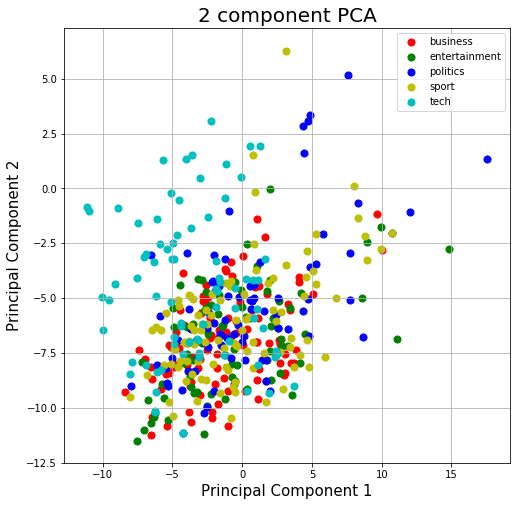

In [114]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

x = cosine_array
y = Test_Y

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


principalDf.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, test_df[['category']]], axis = 1)
finalDf=finalDf.dropna()
print(finalDf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['business', 'entertainment', 'politics','sport','tech']
colors = ['r', 'g', 'b','y','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
            finalDf.loc[indicesToKeep, 'principal component 2'],
            c = color,
            s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#PCA WITH BOW AND CLUSTERING

[-1 -1 -1 ... 52 -1 -1]
     principal component 1  principal component 2  category
0                -2.669419              -1.252406  business
1                -1.054136              -1.577286  business
2                -2.925728              -2.091730  business
3                -2.380751              -0.852453  business
4                -3.418641              -1.958429  business
..                     ...                    ...       ...
439               4.146181               0.185585      tech
440               0.419783               0.778499      tech
441              -2.485802               0.607604      tech
442              -2.861096              -0.682855      tech
443              -2.135124              -1.244046      tech

[444 rows x 3 columns]


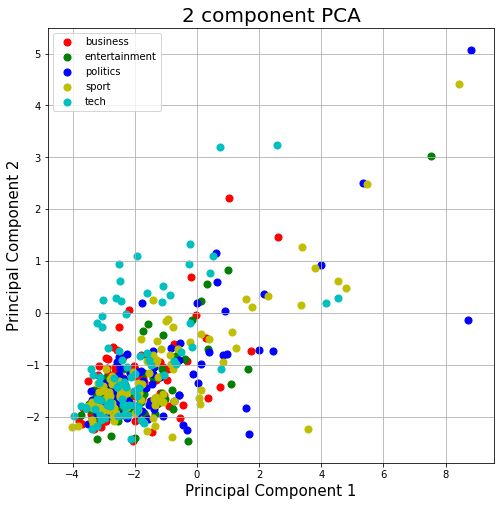

In [113]:
from sklearn.cluster import DBSCAN

x = BOW_Train_X
y = Test_Y

clustering = DBSCAN(eps=3, min_samples=2).fit_predict(x)
print(clustering)

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


principalDf.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, test_df[['category']]], axis = 1)
finalDf=finalDf.dropna()
print(finalDf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['business', 'entertainment', 'politics','sport','tech']
colors = ['r', 'g', 'b','y','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
            finalDf.loc[indicesToKeep, 'principal component 2'],
            c = color,
            s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#FastICA with BOW

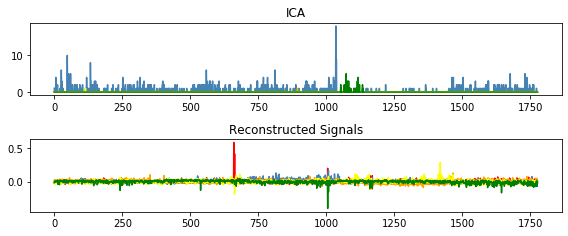

In [101]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=5,
             random_state=0)

x = BOW_Train_X
y = Test_Y


S_ = ica.fit_transform(x)  # Reconstruct signals

plt.figure(figsize=(8,8))

models = [x, S_]
targets = ['ICA','Reconstructed Signals']
colors = ['red', 'steelblue', 'orange','yellow','green'] #Every color represents a category

for i, (model, target) in enumerate(zip(models, targets), 1):
    plt.subplot(5, 1, i)
    plt.title(target)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [ ]:
#ICA WITH TF-IDF

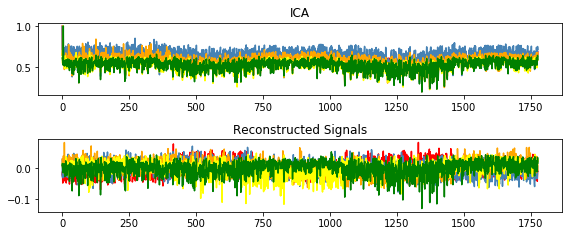

In [103]:
ica = FastICA(n_components=5,
             random_state=0)

x = cosine_array
y = Test_Y


S_ = ica.fit_transform(x)  # Reconstruct signals

plt.figure(figsize=(8,8))

models = [x, S_]
targets = ['ICA','Reconstructed Signals']
colors = ['red', 'steelblue', 'orange','yellow','green'] #Every color represents a category

for i, (model, target) in enumerate(zip(models, targets), 1):
    plt.subplot(5, 1, i)
    plt.title(target)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [ ]:
#SVD WITH BOW

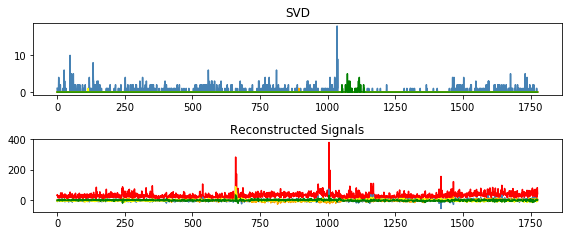

In [102]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
x = BOW_Train_X
svd.fit(x)

S_ = svd.fit_transform(x)  # Reconstruct signals

plt.figure(figsize=(8,8))

models = [x, S_]
targets = ['SVD','Reconstructed Signals']
colors = ['red', 'steelblue', 'orange','yellow','green']

for i, (model, target) in enumerate(zip(models, targets), 1):
    plt.subplot(5, 1, i)
    plt.title(target)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [ ]:
#SVD WITH TF-IDF

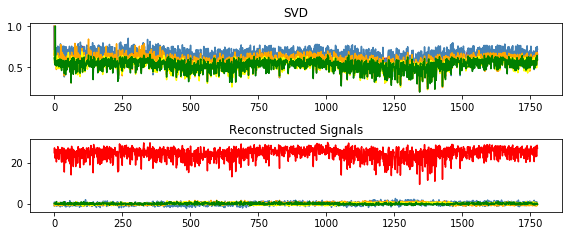

In [104]:
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)

x = cosine_array

svd.fit(x)

S_ = svd.fit_transform(x)  # Reconstruct signals

plt.figure(figsize=(8,8))

models = [x, S_]
targets = ['SVD','Reconstructed Signals']
colors = ['red', 'steelblue', 'orange','yellow','green']

for i, (model, target) in enumerate(zip(models, targets), 1):
    plt.subplot(5, 1, i)
    plt.title(target)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [53]:
from gensim.models import Word2Vec

model = Word2Vec(txt1, min_count=3, size=200, workers=2, window=5, iter=30)

In [78]:
# cosine_array = model.similarity()

# SpectralClustering(n_clusters=5,affinity='precomputed').fit_predict(cosine_array)